In [64]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, accuracy_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn import set_config
# import warnings
# warnings.simplefilter(action='ignore', category=Warning)

In [54]:
dados = pd.read_csv("seattle-weather.csv")
dados['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [55]:
dados['weather'] = dados['weather'].map({'sun': 0, 'fog': 0, 'drizzle': 0, 'snow': 0,'rain': 1})
        
dados.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,1
2,2012-01-03,0.8,11.7,7.2,2.3,1
3,2012-01-04,20.3,12.2,5.6,4.7,1
4,2012-01-05,1.3,8.9,2.8,6.1,1


In [58]:
dados.info()
# dados['weather'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 68.6+ KB


[[151  13]
 [ 27 102]]


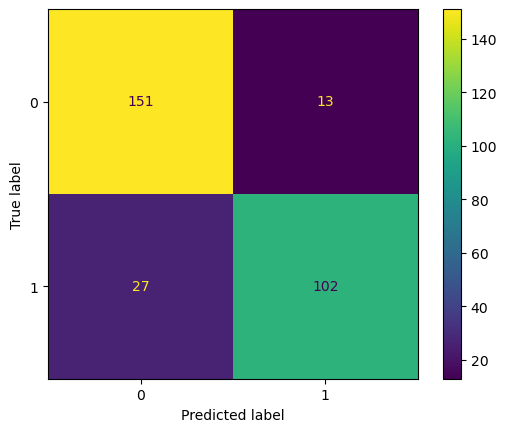

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       164
           1       0.89      0.79      0.84       129

    accuracy                           0.86       293
   macro avg       0.87      0.86      0.86       293
weighted avg       0.87      0.86      0.86       293


# ====================

[[611  45]
 [ 84 428]]


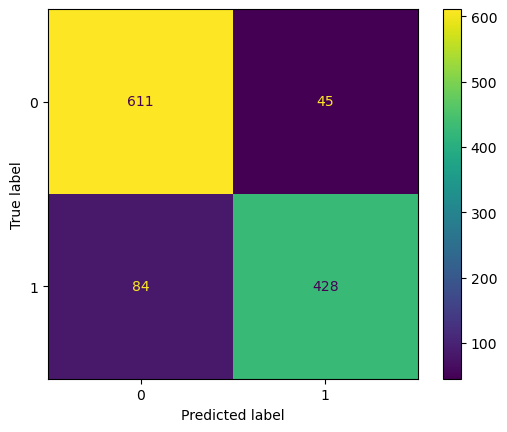

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       656
           1       0.90      0.84      0.87       512

    accuracy                           0.89      1168
   macro avg       0.89      0.88      0.89      1168
weighted avg       0.89      0.89      0.89      1168



In [61]:
X = dados.drop(columns=["weather", 'date'])
y = dados["weather"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas).fit(X_train, y_train)

y_pred_test = pipe.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))


print("\n# ====================\n")

y_pred_train = pipe.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

In [65]:
X = dados.drop(columns=["weather", 'date'])
y = dados["weather"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas).fit(X_train, y_train)

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean", "minkowski"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 114 candidates, totalling 1140 fits
[CV 1/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/114] END knn__metric=man

[CV 2/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 3/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 4/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 5/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 6/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 6/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__w

[CV 7/10; 9/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 9/114] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 8/10; 9/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 9/114] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 9/10; 9/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 9/114] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 10/10; 9/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 10/114] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 1/10; 10/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 10/114] START knn__metric=manhattan, knn__n_neighbors=6,

[CV 10/10; 13/114] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 14/114] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 1/10; 14/114] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 14/114] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 2/10; 14/114] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 14/114] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 3/10; 14/114] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 14/114] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 4/10; 14/114] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 14/114] START knn__metric=manhattan, knn__n_

[CV 6/10; 18/114] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 18/114] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 7/10; 18/114] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 18/114] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 8/10; 18/114] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 18/114] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 9/10; 18/114] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 18/114] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 10/10; 18/114] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 19/114] START knn__metric=manhatt

[CV 10/10; 22/114] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 23/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 1/10; 23/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 23/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 2/10; 23/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 23/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 3/10; 23/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 23/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 4/10; 23/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 23/114] START knn__metric=manhattan, knn__

[CV 4/10; 27/114] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 27/114] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 5/10; 27/114] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=nan total time=   0.0s
[CV 6/10; 27/114] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 6/10; 27/114] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 27/114] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 7/10; 27/114] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 27/114] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 8/10; 27/114] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 27/114] START knn__metric=manhattan, knn__n_

[CV 7/10; 31/114] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 31/114] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 8/10; 31/114] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 31/114] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 9/10; 31/114] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 31/114] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 10/10; 31/114] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 32/114] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance
[CV 1/10; 32/114] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 32/114] START knn__metric=manhattan, knn

[CV 10/10; 35/114] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 36/114] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 1/10; 36/114] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 36/114] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 2/10; 36/114] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 36/114] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 3/10; 36/114] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 36/114] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 4/10; 36/114] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 36/114] START knn__metric=manhattan

[CV 5/10; 40/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 40/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 6/10; 40/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 40/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 7/10; 40/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 40/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 8/10; 40/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 40/114] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 9/10; 40/114] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 40/114] START knn__metric=euclidean, knn__n

[CV 9/10; 44/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 44/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 10/10; 44/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 45/114] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 1/10; 45/114] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 45/114] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 2/10; 45/114] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 45/114] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 3/10; 45/114] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 45/114] START knn__metric=euclidean, knn__n_neig

[CV 2/10; 49/114] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 49/114] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 3/10; 49/114] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 49/114] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 4/10; 49/114] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 49/114] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 5/10; 49/114] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=nan total time=   0.0s
[CV 6/10; 49/114] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 6/10; 49/114] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 49/114] START knn__metric=euclidean, knn__n_neighbors

[CV 7/10; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 53/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 8/10; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 53/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 9/10; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 53/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 10/10; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 54/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 1/10; 54/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 54/114] START knn__metric=euclidean, knn__n_neigh

[CV 4/10; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 58/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 5/10; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 58/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 6/10; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 58/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 7/10; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 58/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 8/10; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 58/114] START knn__metric=euclidean

[CV 2/10; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 63/114] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 3/10; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 63/114] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 4/10; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 63/114] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 5/10; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=nan total time=   0.0s
[CV 6/10; 63/114] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 6/10; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 63/114] START knn__metric=euclidean, knn__n_

[CV 6/10; 67/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 67/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 7/10; 67/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 67/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 8/10; 67/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 67/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 9/10; 67/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 67/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 10/10; 67/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 68/114] START knn__metric=euclidean, knn__

[CV 10/10; 71/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 72/114] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance
[CV 1/10; 72/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 72/114] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance
[CV 2/10; 72/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 72/114] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance
[CV 3/10; 72/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 72/114] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance
[CV 4/10; 72/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 72/114] START knn__metric=euclidean

[CV 10/10; 76/114] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 77/114] START knn__metric=minkowski, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 77/114] END knn__metric=minkowski, knn__n_neighbors=2, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 77/114] START knn__metric=minkowski, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 77/114] END knn__metric=minkowski, knn__n_neighbors=2, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 77/114] START knn__metric=minkowski, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 77/114] END knn__metric=minkowski, knn__n_neighbors=2, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 77/114] START knn__metric=minkowski, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 77/114] END knn__metric=minkowski, knn__n_neighbors=2, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 77/114] START knn__metric=minkowski, knn__n_neighb

[CV 6/10; 81/114] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 81/114] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 81/114] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 81/114] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 81/114] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 81/114] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 81/114] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 81/114] START knn__metric=minkowski, knn__n_neighbors=4, knn__weights=uniform
[CV 10/10; 81/114] END knn__metric=minkowski, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 82/114] START knn__metric=minkowski, knn__n_neighbo

[CV 10/10; 85/114] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 86/114] START knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance
[CV 1/10; 86/114] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 86/114] START knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance
[CV 2/10; 86/114] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 86/114] START knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance
[CV 3/10; 86/114] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 86/114] START knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance
[CV 4/10; 86/114] END knn__metric=minkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 86/114] START knn__metric=minkowski, knn__n_

[CV 4/10; 90/114] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 90/114] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance
[CV 5/10; 90/114] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 90/114] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance
[CV 6/10; 90/114] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 90/114] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance
[CV 7/10; 90/114] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 90/114] START knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance
[CV 8/10; 90/114] END knn__metric=minkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 90/114] START knn__metric=minkowski, knn__n_

[CV 2/10; 95/114] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 95/114] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 3/10; 95/114] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 95/114] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 4/10; 95/114] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 95/114] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 5/10; 95/114] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform;, score=nan total time=   0.0s
[CV 6/10; 95/114] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 6/10; 95/114] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 95/114] START knn__metric=minkowski, knn__n_

[CV 6/10; 99/114] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 99/114] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform
[CV 7/10; 99/114] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 99/114] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform
[CV 8/10; 99/114] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 99/114] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform
[CV 9/10; 99/114] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 99/114] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform
[CV 10/10; 99/114] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 100/114] START knn__metric=minkowski, knn_

[CV 1/10; 104/114] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 104/114] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 2/10; 104/114] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 104/114] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 3/10; 104/114] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 104/114] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 4/10; 104/114] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 104/114] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance
[CV 5/10; 104/114] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 104/114] START knn__metric

[CV 6/10; 108/114] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 108/114] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance
[CV 7/10; 108/114] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 108/114] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance
[CV 8/10; 108/114] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 108/114] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance
[CV 9/10; 108/114] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 108/114] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance
[CV 10/10; 108/114] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 109/114] START knn__metr

[CV 1/10; 113/114] END knn__metric=minkowski, knn__n_neighbors=20, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 113/114] START knn__metric=minkowski, knn__n_neighbors=20, knn__weights=uniform
[CV 2/10; 113/114] END knn__metric=minkowski, knn__n_neighbors=20, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 113/114] START knn__metric=minkowski, knn__n_neighbors=20, knn__weights=uniform
[CV 3/10; 113/114] END knn__metric=minkowski, knn__n_neighbors=20, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 113/114] START knn__metric=minkowski, knn__n_neighbors=20, knn__weights=uniform
[CV 4/10; 113/114] END knn__metric=minkowski, knn__n_neighbors=20, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 113/114] START knn__metric=minkowski, knn__n_neighbors=20, knn__weights=uniform
[CV 5/10; 113/114] END knn__metric=minkowski, knn__n_neighbors=20, knn__weights=uniform;, score=nan total time=   0.0s
[CV 6/10; 113/114] START knn__metric=minkowsk

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

In [67]:
set_config(display='text')
grid_knn.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=2))])